# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [9]:
x = np.linspace(-10, 10, 100)

y 自然是 $\sin(x)$。

In [10]:
y = np.sin(x)

畫圖!

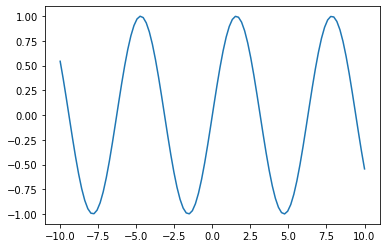

In [11]:
plt.plot(x, y)

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

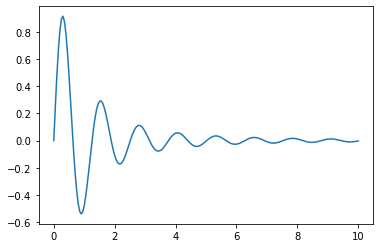

In [13]:
x = np.linspace(0, 10, 200)
y = np.sin(5.0*x)/(1.0+np.power(x, 2))
plt.plot(x, y)

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

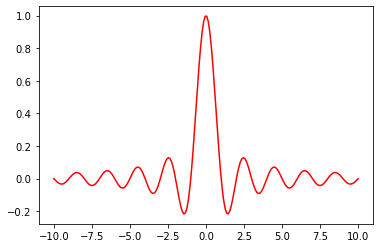

In [15]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y, "-r")

### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

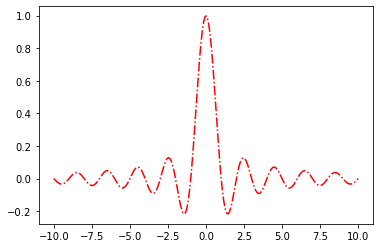

In [16]:
plt.plot(x, y, "-.r")

## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

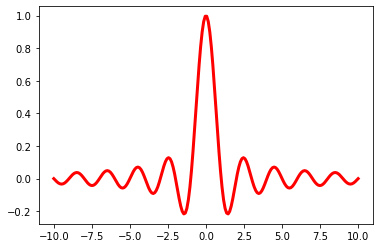

In [17]:
plt.plot(x, y, c = "r", lw = 3)

## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [18]:
pi = np.pi
r = 3.0
t = np.linspace(-2.0*pi, 2.0*pi, 100)

In [22]:
x = r*np.sin(t)
y = r*np.cos(t)

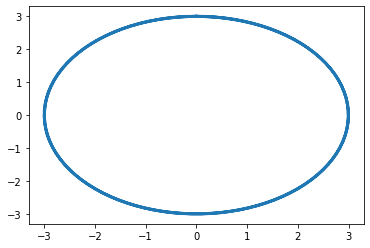

In [24]:
plt.plot(x, y, lw = 3)

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

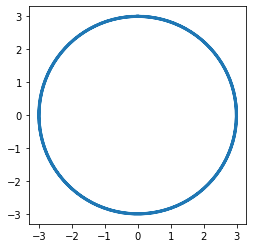

In [26]:
plt.gca().set_aspect("equal")
plt.plot(x, y, lw = 3)

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

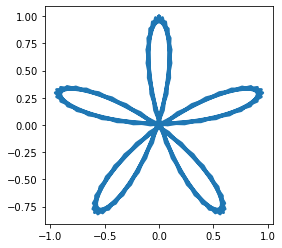

In [33]:
pi = np.pi
t = np.linspace(-2.0*pi, 2.0*pi, 100)
r = np.cos(5*t)
x = r*np.sin(t)
y = r*np.cos(t)
plt.plot(x, y, lw = 3)
plt.gca().set_aspect("equal")


是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

<BarContainer object of 10 artists>

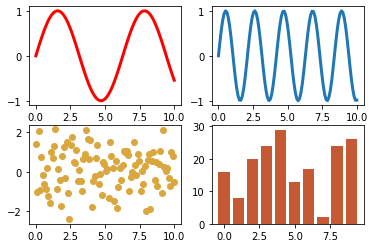

In [39]:
x = np.linspace(0, 10, 100)
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x), c = "r", lw = 3)

plt.subplot(2, 2, 2)
plt.plot(x, np.sin(3*x), lw = 3)

plt.subplot(2, 2, 3)
plt.scatter(x, np.random.randn(100), c = "#daa73e")

plt.subplot(2, 2, 4)
plt.bar(range(10), np.random.randint(0, 30, 10), fc = "#c55934")

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

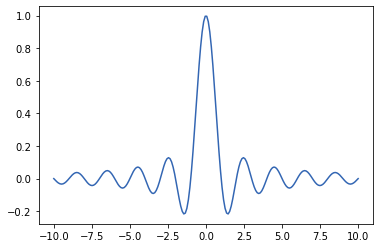

In [41]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y, c = (0.2, 0.4, 0.7))


## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [42]:
x = range(10)
y = np.random.randn(10)

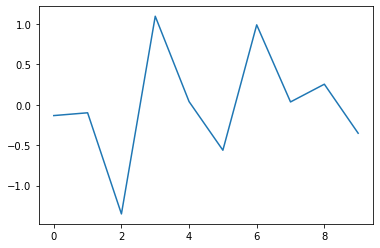

In [43]:
plt.plot(x, y)

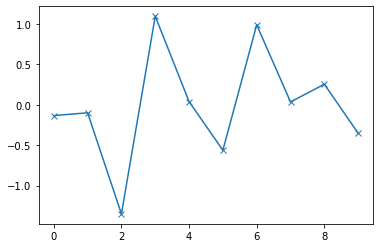

In [44]:
plt.plot(x, y, marker = "x")

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

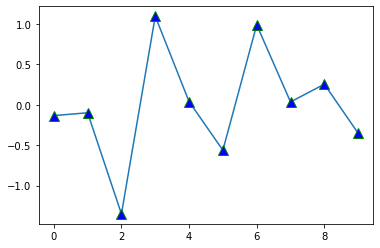

In [48]:
plt.plot(x, y, marker = "^", mec = "g", ms = 10, mfc = "b")

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

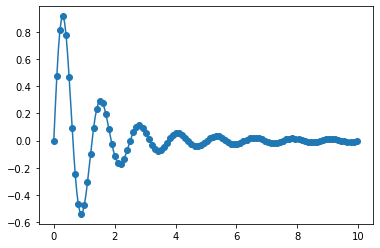

In [49]:
x = np.linspace(0, 10, 200)
y = np.sin(5.0*x)/(1.0+np.power(x, 2))
plt.plot(x, y, marker = 'o', markevery = 2)

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

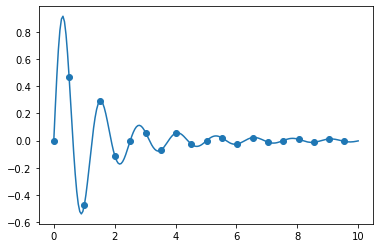

In [50]:
plt.plot(x, y, marker = 'o', markevery = 10)

## 8 bar 風*

<BarContainer object of 5 artists>

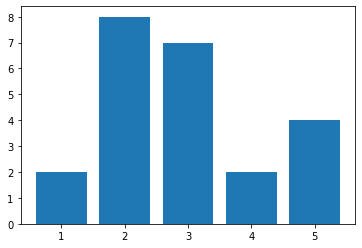

In [53]:
plt.bar(range(1, 6), np.random.randint(1, 10, 5))

移一點點。

<BarContainer object of 5 artists>

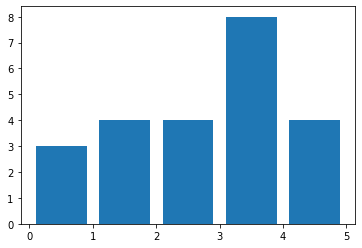

In [56]:
plt.bar(np.arange(0.5, 5), np.random.randint(1, 10, 5))

#### 雙色的長條圖

<BarContainer object of 5 artists>

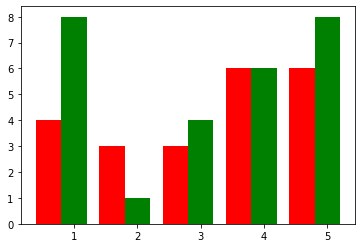

In [60]:
x = np.arange(1, 6)
plt.bar(x-0.4, np.random.randint(0, 10, 5), fc = "r", width = 0.4)
plt.bar(x, np.random.randint(0, 10, 5), fc = "g", width = 0.4)

#### 疊加型的資料

<BarContainer object of 5 artists>

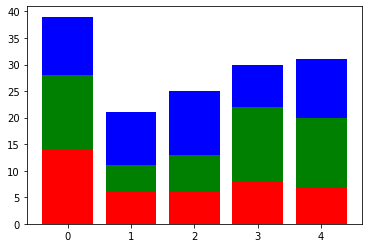

In [64]:
x = range(5)
a = np.random.randint(5, 15, 5)
b = np.random.randint(5, 15, 5)
c = np.random.randint(5, 15, 5)

plt.bar(x, a, fc = "r")
plt.bar(x, b, fc = "g", bottom = a)
plt.bar(x, c, fc = "b", bottom = a+b)

#### 橫放的長條圖

<BarContainer object of 5 artists>

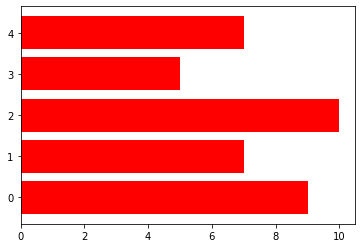

In [66]:
x = range(5)
a = np.random.randint(5, 15, 5)

plt.barh(x, a, fc = "r")

#### 雙向的長條圖

([<matplotlib.axis.XTick at 0x12ee1d62040>,
 [Text(-15, 0, '15'),
  Text(-10, 0, '10'),
  Text(-5, 0, '5'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15')])

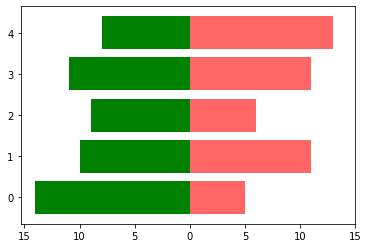

In [78]:
x = range(5)
a = np.random.randint(5, 15, 5)
b = np.random.randint(5, 15, 5)

plt.barh(x, a, fc = "#FF6666")
plt.barh(x, -b, fc = "g")
plt.xticks(range(-15, 16, 5),[abs(index) for index in range(-15, 16, 5)])

## 9 畫圖區的設定*

#### 說明文字的標示

In [80]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

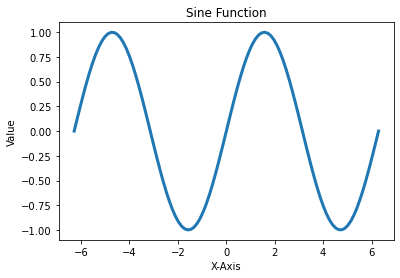

In [83]:
plt.xlabel("X-Axis")
plt.ylabel("Value")
plt.title("Sine Function")
plt.plot(x,y, lw=3)

#### 邊界的設定

(-1.0, 1.0)

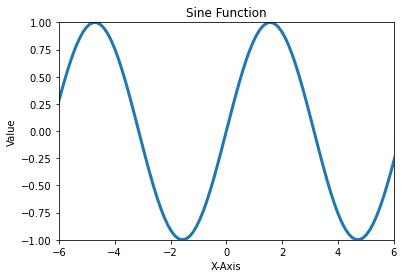

In [86]:
plt.figure()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)
plt.xlabel("X-Axis")
plt.ylabel("Value")
plt.title("Sine Function")
plt.plot(x,y, lw=3)
plt.xlim(-6, 6)
plt.ylim(-1, 1)


#### xticks

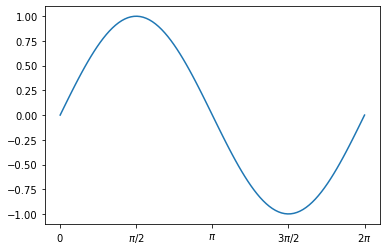

In [91]:
plt.figure()
pi = np.pi
x = np.linspace(0, 2*pi, 100)
y = np.sin(x)
plt.xticks([0, pi/2, pi, 3*pi/2, 2*pi], ["$0$", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.plot(x, y)

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

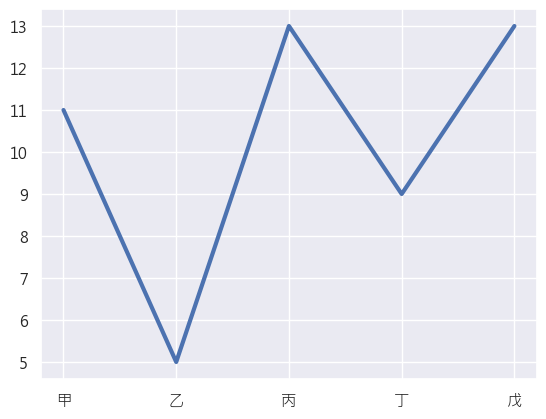

In [128]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
x = range(5)
y = np.random.randint(5, 15, 5)
plt.figure()
plt.xticks(range(5),["甲", "乙", "丙", "丁", "戊"])
plt.plot(x, y, lw = 3)

#### 圖例 legend

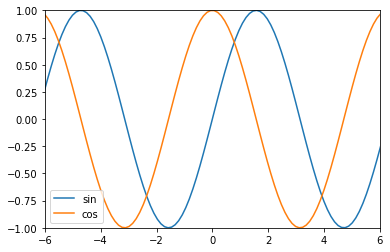

In [96]:
plt.figure()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), label = "sin")
plt.plot(x, np.cos(x), label = "cos")
plt.xlim([-6, 6])
plt.ylim([-1, 1])
plt.legend()

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。

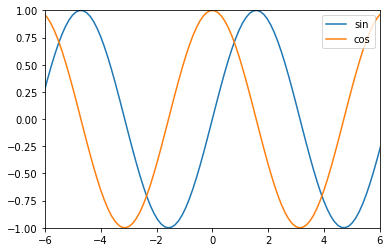

In [102]:
plt.figure()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), label = "sin")
plt.plot(x, np.cos(x), label = "cos")
plt.xlim([-6, 6])
plt.ylim([-1, 1])
plt.legend(loc = 1)

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

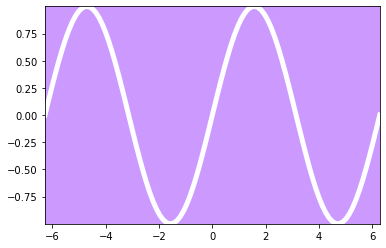

In [106]:
plt.figure()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), lw = 5, c = "w")
ax = plt.gca()
ax.set_facecolor("#CC99FF")
ax.autoscale(tight=True)

#### 移動 x, y 座標軸

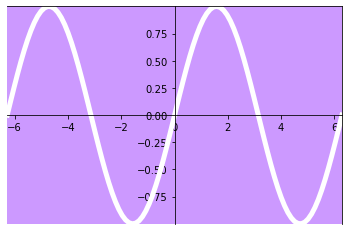

In [108]:
plt.figure()
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, np.sin(x), lw = 5, c = "w")
ax = plt.gca()
ax.set_facecolor("#CC99FF")
ax.autoscale(tight=True)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

## 11 耍寶可愛的 `xkcd`*

In [112]:
plt.xkcd()

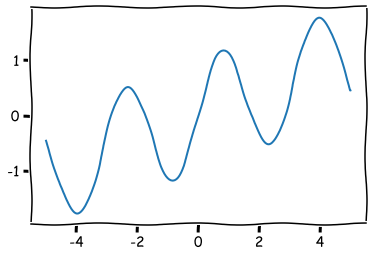

In [111]:
x = np.linspace(-5, 5, 200)
y = np.sin(2*x) + 0.2*x
plt.plot(x, y)

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [122]:
import seaborn as sns

然後像平常畫個圖。

In [125]:
plt.rcdefaults()
sns.set(color_codes = True)

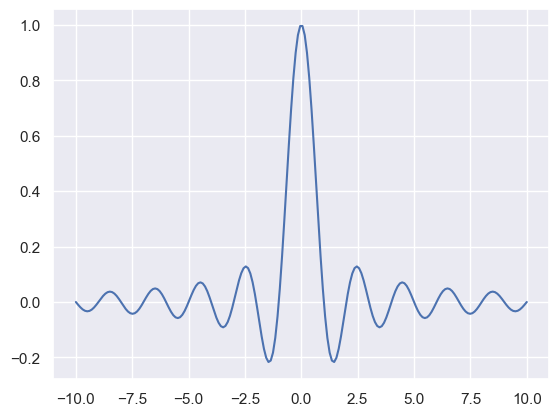

In [126]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y)

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)